In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
air_quality = pd.read_csv("data/air_quality_no2.csv", index_col=0, parse_dates=True)
air_quality.head()

,station_antwerp,station_paris,station_london
datetime,,,
2019-05-07 02:00:00,NaN,NaN,23.0
2019-05-07 03:00:00,50.5,25.0,19.0
2019-05-07 04:00:00,45.0,27.7,19.0
2019-05-07 05:00:00,NaN,50.4,16.0
2019-05-07 06:00:00,NaN,61.9,NaN


# ¿Cómo crear tramas en pandas?

<img src="data/04_plot_overview.svg">

### Quiero una revisión visual rápida de los datos.

<AxesSubplot:xlabel='datetime'>

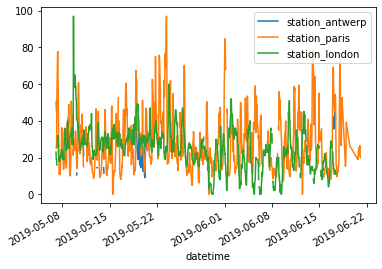

In [3]:
air_quality.plot()

Con un DataFrame, pandas crea por defecto un gráfico de líneas para cada una de las columnas con datos numéricos.

### Quiero trazar solo las columnas de la tabla de datos con los datos de París.

<AxesSubplot:xlabel='datetime'>

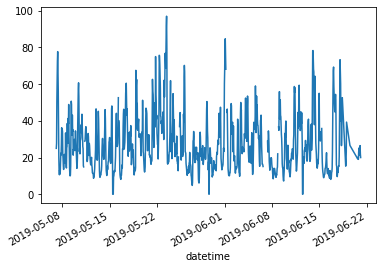

In [4]:
air_quality["station_paris"].plot()

Para trazar una columna específica, use el método de selección del tutorial de datos de subconjuntos en combinación con el método `plot()`. Por lo tanto, el método `plot()` funciona tanto en Series como en DataFrame.

### Quiero comparar visualmente los valores de $N0_2$ medidos en Londres frente a París.

<AxesSubplot:xlabel='station_london', ylabel='station_paris'>

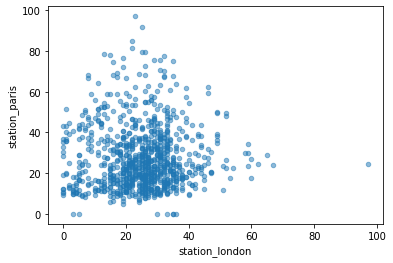

In [5]:
air_quality.plot.scatter(x="station_london", y="station_paris", alpha=0.5)

*Observaciones*

Además del gráfico de linea predeterminado cuando se usa la función plot, hay varias alternativas disponibles para graficar datos. Usemos Python estándar para obtener una descripción general de los métodos de trazado disponibles:

In [6]:
[
    method_name
    for method_name in dir(air_quality.plot)
    if not method_name.startswith("_")
]

['area',
 'bar',
 'barh',
 'box',
 'density',
 'hexbin',
 'hist',
 'kde',
 'line',
 'pie',
 'scatter']

*Observaciones*

> Nota: En muchos entornos de desarrollo, así como en IPython y Jupyter Notebook, use el botón `TAB` para obtener una descripción general de los métodos disponibles, por ejemplo `air_quality.plot.+ TAB`.

Una de las opciones es `DataFrame.plot.box()`, que se refiere a un diagrama de caja. El método box() es aplicable en los datos de ejemplo de calidad del aire:

<AxesSubplot:>

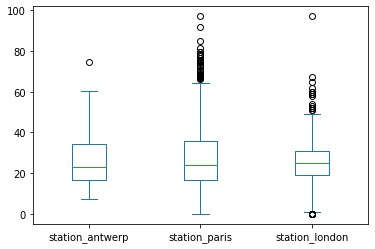

In [7]:
air_quality.plot.box()

### Quiero cada una de las columnas en una subparcela separada.

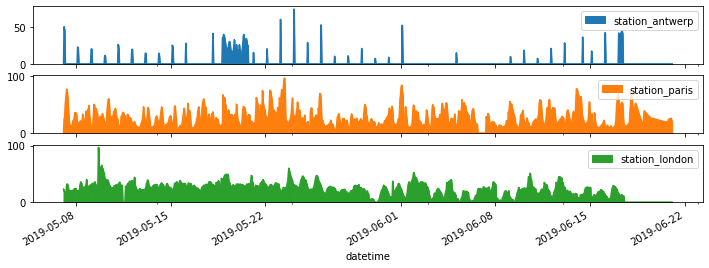

In [8]:
axs = air_quality.plot.area(figsize=(12,4), subplots=True)

El argumento `subplots` de las funciones admite gráficos secundarios separados para cada una de las columnas de datos `plot`. Vale la pena revisar las opciones integradas disponibles en cada una de las funciones de diagrama de pandas.

### Quiero personalizar, ampliar o guardar aún más el gráfico resultante.

<AxesSubplot:xlabel='datetime'>

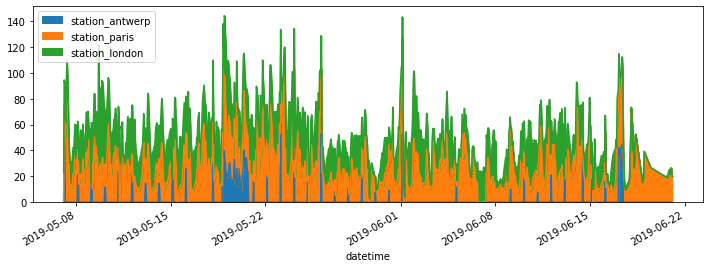

In [9]:
fig, axs = plt.subplots(figsize=(12,4))
air_quality.plot.area(ax= axs)

In [10]:
axs.set_ylabel("NO$_2$ concentration")

Text(3.200000000000017, 0.5, 'NO$_2$ concentration')

In [11]:
fig.savefig("no2_concentration.png")

Cada uno de los objetos de trazado creados por pandas es un objeto matplotlib . Como Matplotlib proporciona muchas opciones para personalizar los gráficos, hacer que el vínculo entre pandas y Matplotlib sea explícito habilita todo el poder de matplotlib para el gráfico. Esta estrategia se aplica en el ejemplo anterior:

## RECORDAR
* Los métodos `.plot.*` son aplicables tanto en Series como en DataFrames.

* Por defecto, cada una de las columnas se traza como un elemento diferente (línea, diagrama de caja,…)

* Cualquier trama creada por pandas es un objeto Matplotlib.